## Desciption

This model is fairly simple, using the same architecture as CNN_1_3, which we found to be the best. It does not include augmented data, just takes the data from La Fleur's supplemental materials including:
 - La Fleur et al (and De Novo Designs)
 - Urtecho et al
 - Hossain et al
 - Yu et al
 - Lagator (36N, Pl, and Pr)
 - Anderson Series

We onehot encode each basepair and pad the whole sequence. Because we use a CNN which is designed to identify "features," the input promoter can be any length (with padding) and the model will be able to accurately predict the expression.

In [1]:
import CNN_5_0 as parent

In [2]:
name = 'CNN_5_0'

In [3]:
file_path = '../Data/combined/LaFleur_supp.csv'

df = parent.load_and_preprocess_data(file_path)

In [4]:
df['File Name'].unique()

array(['La Fleur et al (Fig 3a).csv', 'Urtecho et al (Fig 3c, S7b).csv',
       'Hossain et al (Fig 3d, S7d).csv', 'Yu et al (Fig S3).csv',
       'Lagator 36N.csv', 'Lagator Pl.csv', 'Lagator Pr.csv',
       'Anderson Series (Fig 4c).csv',
       'De Novo Designs (Fig 5 b and c).csv'], dtype=object)

In [5]:
X, y = parent.combine_columns(df)
X, max_length = parent.preprocess_sequences(X)

In [5]:
X.shape

(48767, 150, 4)

In [6]:
X_train, X_test, y_train, y_test = parent.train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

Epoch 1/150


/Users/tien/Documents/GitHub/promoter-sequence-transcription-rates/Synth_CURE_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1220/1220 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0122 - val_loss: 0.0046
Epoch 2/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0041 - val_loss: 0.0035
Epoch 3/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 4/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 5/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0026 - val_loss: 0.0040
Epoch 6/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 7/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 8/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 9/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 10/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 11/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0016 - val_loss: 0.0028
Epoch 12/150
1220/1220 ━━━━━━━━

1524/1524 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


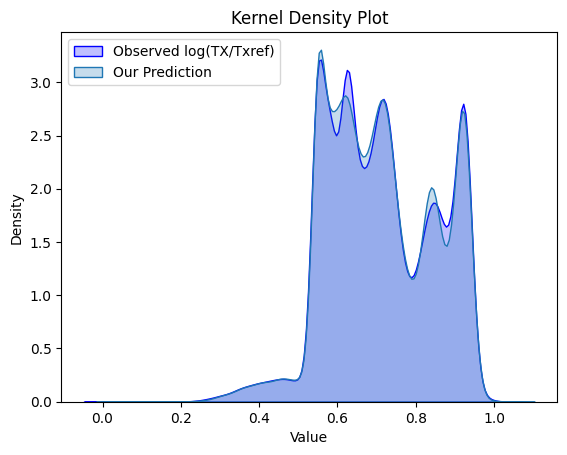

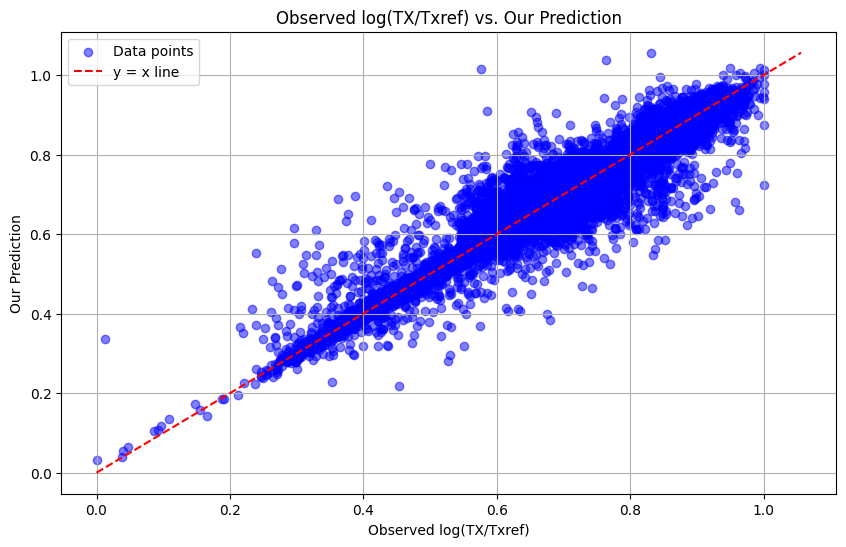

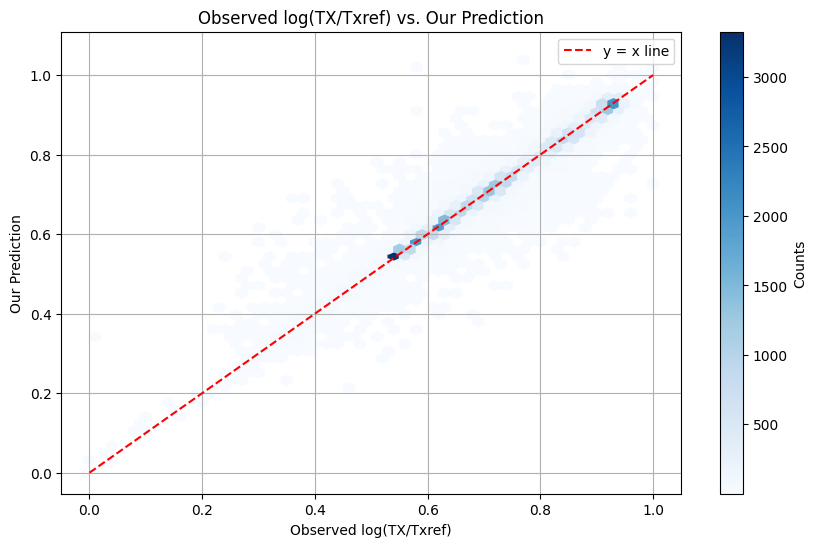

In [10]:
predicted = parent.load_and_predict(name, X)
observed = df['Normalized Observed log(TX/Txref)'].values

parent.plot_kde(df, predicted)
parent.plot_scatter(observed, parent.ravel(predicted))
parent.plot_hexbin(observed, parent.ravel(predicted))

305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


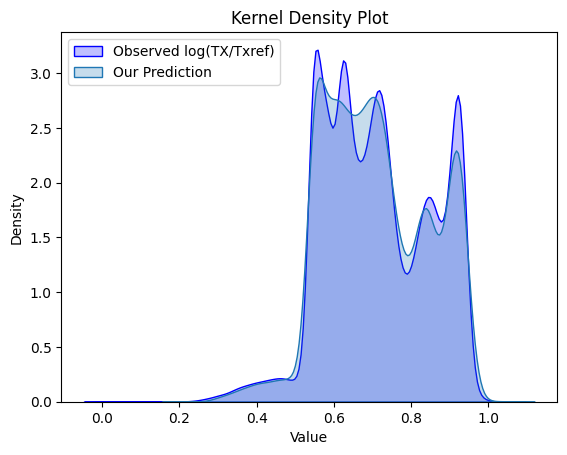

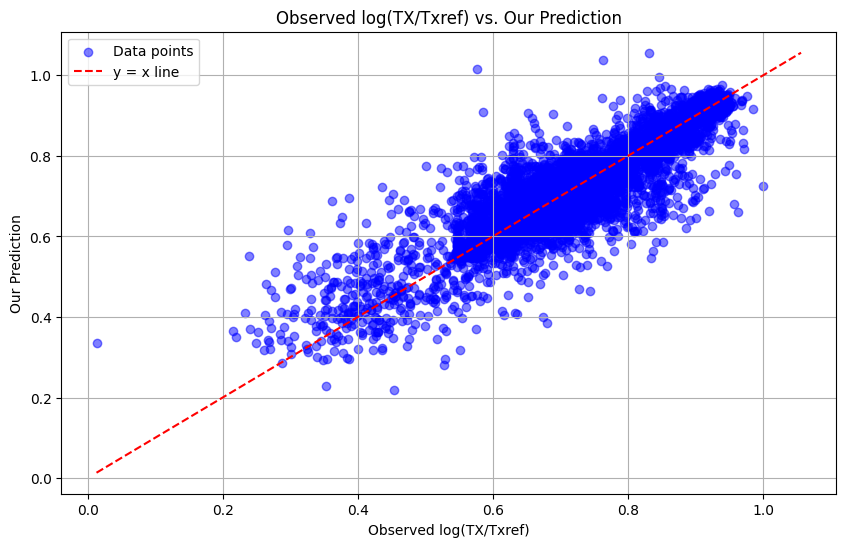

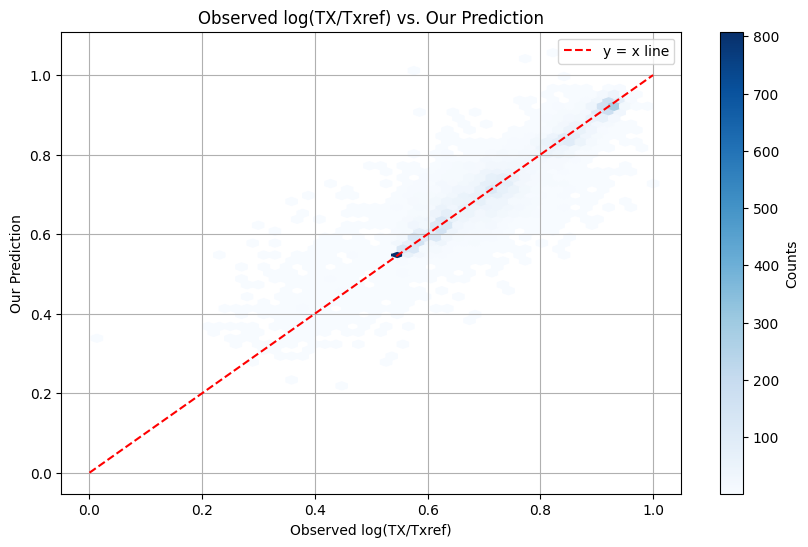

In [12]:
predicted = parent.load_and_predict(name, X_test)
observed = y_test

parent.plot_kde(df, predicted)
parent.plot_scatter(observed, parent.ravel(predicted))
parent.plot_hexbin(observed, parent.ravel(predicted))

In [11]:
loss

0.0026567354798316956

In [7]:
# Load, predict, and evaluate the best model
y_pred = parent.load_and_predict(name, X_test)
mse, rmse, mae, r2 = parent.calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MSE:  0.0026567362699205714
RMSE:  0.051543537615501046
MAE:  0.03221822942428107
R2:  0.859234820511602


In [9]:
from keras.models import Sequential, load_model

model = load_model('../Models/' + name + '.keras')

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 147, 64)        │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 73, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 70, 64)         │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 35, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2240)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       143,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 483,077 (1.84 MB)

 Trainable params: 161,025 (629.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 322,052 (1.23 MB)